In [1]:
import numpy as np
import matplotlib.pyplot as plt

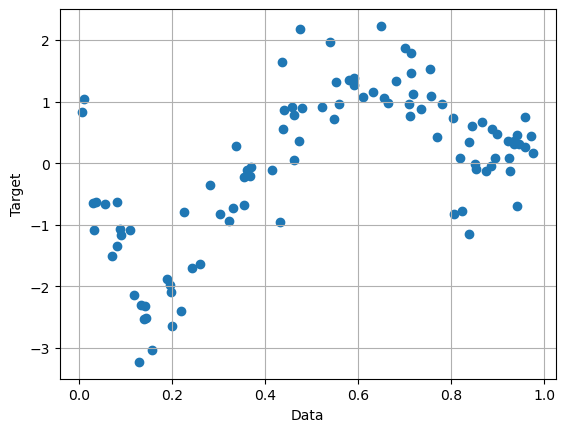

In [2]:
#データ数
n = 100
#データを生成するための関数の定義
def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z

data = np.random.rand(n).astype(np.float32)
data = np.sort(data) #データを小さい順に並び替え
target = true_func(data) #データに対応する正解データ

#ノイズを加える
target = target + 0.5 * np.random.randn(n)

#作成したデータをプロット
plt.scatter(data, target)
plt.ylabel('Target')
plt.xlabel('Data')
plt.grid()
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [12]:
# データとターゲットをモデルに適した形状に変換する
data = data.reshape(-1,1)
target = target.reshape(-1,1)

# 次数の設定
deg = 4

#線形回帰モデルをインスタンス化
lr = LinearRegression()

#多項式の特徴量を生成する
poly = PolynomialFeatures(degree=deg)
x_poly = poly.fit_transform(data)

#多項式モデルに用いる重みを表示
print(x_poly)


[[1.00000000e+00 6.10124040e-03 3.72251343e-05 2.27119500e-07
  1.38571066e-09]
 [1.00000000e+00 9.81760118e-03 9.63852945e-05 9.46272394e-07
  9.29012511e-09]
 [1.00000000e+00 2.87826248e-02 8.28439486e-04 2.38446628e-05
  6.86311978e-07]
 [1.00000000e+00 3.15316357e-02 9.94244008e-04 3.13501405e-05
  9.88521265e-07]
 [1.00000000e+00 3.55018750e-02 1.26038317e-03 4.47459643e-05
  1.58856562e-06]
 [1.00000000e+00 5.46447933e-02 2.98605347e-03 1.63172270e-04
  8.91651507e-06]
 [1.00000000e+00 6.92243353e-02 4.79200855e-03 3.31723597e-04
  2.29633461e-05]
 [1.00000000e+00 8.08162615e-02 6.53126789e-03 5.27832657e-04
  4.26574625e-05]
 [1.00000000e+00 8.12604278e-02 6.60325726e-03 5.36583539e-04
  4.36030095e-05]
 [1.00000000e+00 8.65105763e-02 7.48407980e-03 6.47452078e-04
  5.60114531e-05]
 [1.00000000e+00 8.86989534e-02 7.86750391e-03 6.97839365e-04
  6.18976192e-05]
 [1.00000000e+00 1.09082080e-01 1.18989004e-02 1.29795680e-03
  1.41583834e-04]
 [1.00000000e+00 1.17181085e-01 1.373140

[[   0.        -44.748264  200.887    -286.11295   129.90837 ]]


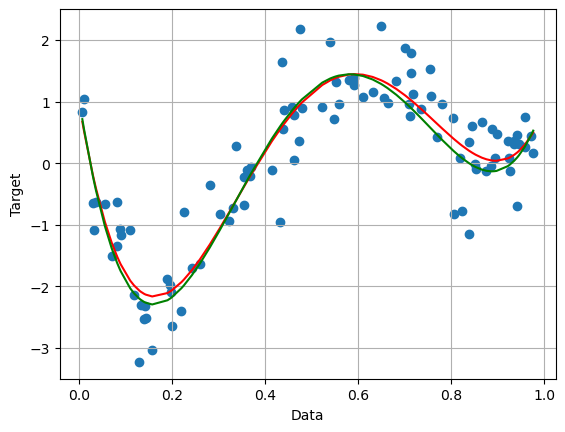

In [13]:
#多項式回帰モデルを学習（重回帰分析の手法と同様に重みを線形として学習）
lr.fit(x_poly, target)
print(lr.coef_)

y_pred = lr.predict(x_poly)

plt.scatter(data, target)
plt.plot(data, y_pred, color='red')
plt.plot(data, true_func(data), color='green')

plt.ylabel('Target')
plt.xlabel('Data')
plt.grid()

plt.show()